In [2]:
import skimage 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import ndimage, stats, signal 
import math
import pandas as pd
import seaborn as sns
%matplotlib inline

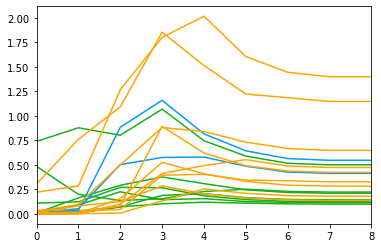

In [3]:
import glob
inputdir = "/Users/sbandya/Desktop/hemocyte_ImageSegmentation/fitc_green/quant/*FITC*"

quantfiles =  glob.glob(inputdir)
#file0 = pd.read_csv(quantfiles[0],sep=",",header=0)
#file0 = file0[['Area','Mean','%Area']]
#file0['%Area'].plot(kind='line')

for others in quantfiles:
    df = pd.read_csv(others,sep=",",header=0)
    df = df[['Area','Mean','%Area']]
    if "24" in others:
        df['%Area'].plot(kind='line',color='orange')
    if "35" in others:
        df['%Area'].plot(kind='line',color='xkcd:azure')
    if "36" in others: 
        df['%Area'].plot(kind='line',color='xkcd:green')
        
    
    


In [4]:
samp = quantfiles[0].split("/")[-1]
qf0 = pd.read_csv(quantfiles[0],sep=",",header=0)
qf0 = qf0[['Area','%Area']]
qf0 = qf0.set_index("Area")
qf0 = qf0.rename(columns={'%Area':samp})

for sample in quantfiles[1:]:
    name = sample.split("/")[-1]
    df = pd.read_csv(sample,sep=",",header=0)
    df = df[['Area','%Area']]
    df = df.set_index("Area")
    df = df.rename(columns={'%Area':name})
    
    qf0 = qf0.join(df,how='outer')
    
qf0

,36H_5_FITC.tif.csv,36G_2_FITC.tif.csv,36D_4_FITC.tif.csv,36D_3_FITC.tif.csv,36E_3_FITC.tif.csv,36E_4_FITC.tif.csv,36B_3_FITC.tif.csv,35A_4_FITC.tif.csv,24D_F1_4_FITC.tif.csv,35A_2_FITC.tif.csv,24E_F1_3_FITC.tif.csv,24C_F1_3_FITC.tif.csv,24D_F2_3_FITC.tif.csv,24E_F4_3_FITC.tif.csv,24C_F1_2_FITC.tif.csv,24E_F3_2_FITC.tif.csv,24E_F2_4_FITC.tif.csv,24E_F2_3_FITC.tif.csv
Area,,,,,,,,,,,,,,,,,,
72560,0.110,0.740,0.010,0.001,0.001,0.485,0.014,0.014,0.037,0.007,0.025,0.000,0.010,0.010,0.000,0.222,0.307,0.006
199484,0.124,0.879,0.163,0.029,0.007,0.199,0.092,0.053,0.034,0.036,0.097,0.004,0.082,0.017,0.000,0.286,0.761,0.002
389220,0.271,0.803,0.292,0.073,0.072,0.137,0.226,0.503,0.045,0.884,0.500,0.156,0.126,0.081,0.100,1.267,1.092,0.009
641836,0.267,1.069,0.377,0.189,0.103,0.154,0.145,0.576,0.395,1.159,0.882,0.526,0.286,0.894,0.412,1.801,1.855,0.133
933028,0.185,0.747,0.309,0.207,0.120,0.229,0.156,0.580,0.404,0.817,0.841,0.410,0.205,0.622,0.493,2.017,1.514,0.255
1183004,0.146,0.590,0.246,0.166,0.110,0.252,0.126,0.487,0.345,0.644,0.732,0.333,0.162,0.492,0.554,1.606,1.224,0.210
1347870,0.129,0.517,0.219,0.148,0.103,0.230,0.118,0.427,0.338,0.565,0.669,0.293,0.142,0.438,0.489,1.445,1.186,0.186
1392003,0.124,0.501,0.212,0.144,0.100,0.223,0.115,0.414,0.328,0.547,0.648,0.284,0.137,0.424,0.474,1.399,1.148,0.180
1392640,0.124,0.501,0.212,0.143,0.100,0.223,0.115,0.414,0.327,0.547,0.648,0.283,0.137,0.424,0.474,1.399,1.148,0.180


In [5]:
starv = qf0.filter(regex='^36|^35')
cond = qf0.filter(regex='^24')

starv.T.describe()


Area,72560,199484,389220,641836,933028,1183004,1347870,1392003,1392640
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.153556,0.175778,0.362333,0.448778,0.372222,0.307444,0.272889,0.264444,0.264333
std,0.270013,0.271470,0.303473,0.404613,0.268953,0.209217,0.181165,0.175442,0.175528
min,0.001000,0.007000,0.072000,0.103000,0.120000,0.110000,0.103000,0.100000,0.100000
25%,0.007000,0.036000,0.137000,0.154000,0.185000,0.146000,0.129000,0.124000,0.124000
50%,0.014000,0.092000,0.271000,0.267000,0.229000,0.246000,0.219000,0.212000,0.212000
75%,0.110000,0.163000,0.503000,0.576000,0.580000,0.487000,0.427000,0.414000,0.414000
max,0.740000,0.879000,0.884000,1.159000,0.817000,0.644000,0.565000,0.547000,0.547000


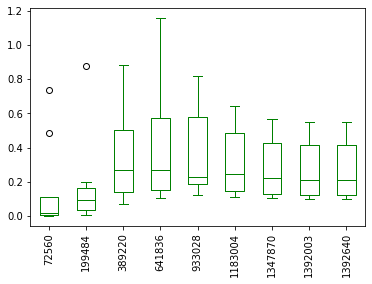

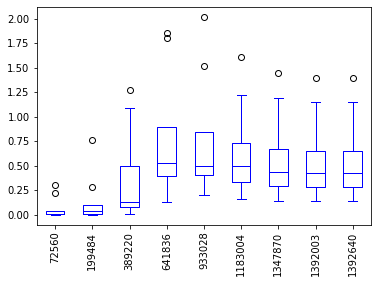

In [6]:
starv.T.plot.box(rot=90,color='green')
cond.T.plot.box(rot=90,color='blue')

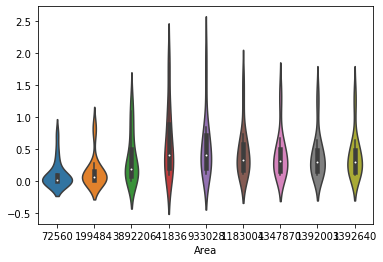

In [7]:
sns.violinplot(data=qf0.T,)

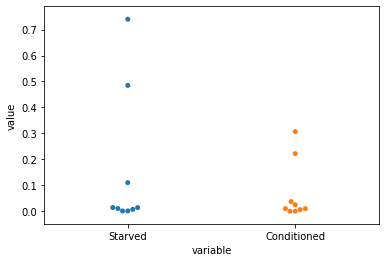

In [8]:
test = qf0[:1].melt().replace(value="Starved",regex="^36.*|^35.*").replace(value="Conditioned",regex="^24.*")
test
#ax = sns.boxplot(x="variable", y="value", data=test)
ax = sns.swarmplot(x="variable", y="value", data=test)

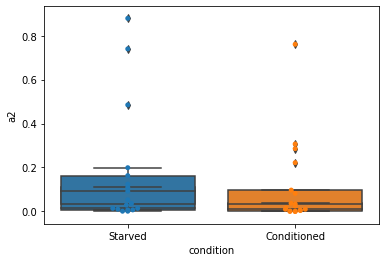

In [9]:
a1 = qf0[:1].melt().replace(value="Starved",regex="^36.*|^35.*").replace(value="Conditioned",regex="^24.*")
a1.columns = ['condition','a1']
a2 = qf0[1:2].melt().replace(value="Starved",regex="^36.*|^35.*").replace(value="Conditioned",regex="^24.*")
a2.columns = ['condition','a2']
ax = sns.swarmplot(x="condition", y="a1", data=a1)
ax = sns.boxplot(x="condition", y="a1", data=a1)
ax = sns.swarmplot(x="condition", y="a2", data=a2)
ax = sns.boxplot(x="condition", y="a2", data=a2)

In [10]:
qf0 = qf0.reset_index()
qf0

,Area,36H_5_FITC.tif.csv,36G_2_FITC.tif.csv,36D_4_FITC.tif.csv,36D_3_FITC.tif.csv,36E_3_FITC.tif.csv,36E_4_FITC.tif.csv,36B_3_FITC.tif.csv,35A_4_FITC.tif.csv,24D_F1_4_FITC.tif.csv,35A_2_FITC.tif.csv,24E_F1_3_FITC.tif.csv,24C_F1_3_FITC.tif.csv,24D_F2_3_FITC.tif.csv,24E_F4_3_FITC.tif.csv,24C_F1_2_FITC.tif.csv,24E_F3_2_FITC.tif.csv,24E_F2_4_FITC.tif.csv,24E_F2_3_FITC.tif.csv
0,72560,0.110,0.740,0.010,0.001,0.001,0.485,0.014,0.014,0.037,0.007,0.025,0.000,0.010,0.010,0.000,0.222,0.307,0.006
1,199484,0.124,0.879,0.163,0.029,0.007,0.199,0.092,0.053,0.034,0.036,0.097,0.004,0.082,0.017,0.000,0.286,0.761,0.002
2,389220,0.271,0.803,0.292,0.073,0.072,0.137,0.226,0.503,0.045,0.884,0.500,0.156,0.126,0.081,0.100,1.267,1.092,0.009
3,641836,0.267,1.069,0.377,0.189,0.103,0.154,0.145,0.576,0.395,1.159,0.882,0.526,0.286,0.894,0.412,1.801,1.855,0.133
4,933028,0.185,0.747,0.309,0.207,0.120,0.229,0.156,0.580,0.404,0.817,0.841,0.410,0.205,0.622,0.493,2.017,1.514,0.255
5,1183004,0.146,0.590,0.246,0.166,0.110,0.252,0.126,0.487,0.345,0.644,0.732,0.333,0.162,0.492,0.554,1.606,1.224,0.210
6,1347870,0.129,0.517,0.219,0.148,0.103,0.230,0.118,0.427,0.338,0.565,0.669,0.293,0.142,0.438,0.489,1.445,1.186,0.186
7,1392003,0.124,0.501,0.212,0.144,0.100,0.223,0.115,0.414,0.328,0.547,0.648,0.284,0.137,0.424,0.474,1.399,1.148,0.180
8,1392640,0.124,0.501,0.212,0.143,0.100,0.223,0.115,0.414,0.327,0.547,0.648,0.283,0.137,0.424,0.474,1.399,1.148,0.180


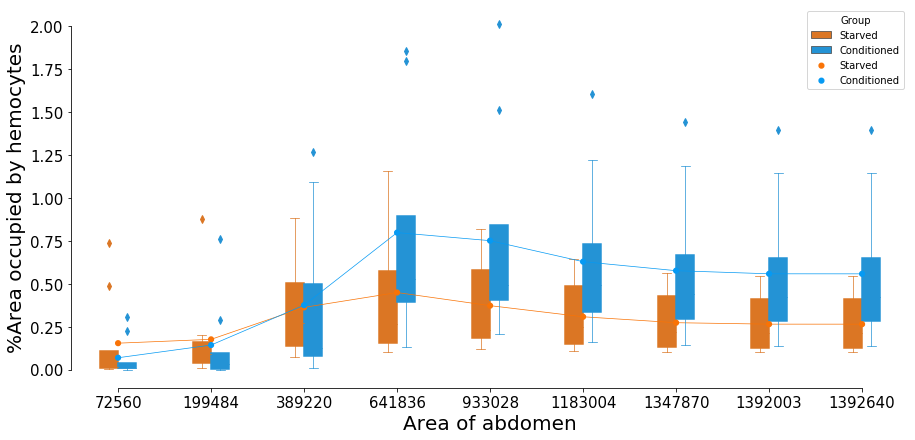

In [16]:
plotdist = qf0.melt(id_vars=['Area']).replace(value="Starved",regex="^36.*|^35.*").replace(value="Conditioned",regex="^24.*")
plotdist.columns = ['Area of abdomen','Group','%Area occupied by hemocytes']
plotdist
fig,ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x='Area of abdomen',y='%Area occupied by hemocytes',hue='Group',data=plotdist,
                 palette=["xkcd:orange", "xkcd:azure"],
                 width=0.4)
ax = sns.pointplot(x='Area of abdomen',y='%Area occupied by hemocytes', hue='Group',data=plotdist,
                   palette=["xkcd:orange", "xkcd:azure"],
                   ci=None,scale =0.7)
ax.set_xlabel('Area of abdomen', fontsize = 20)
ax.set_ylabel('%Area occupied by hemocytes', fontsize = 20)
#ax.set_xticklabel(fontsize = 20)
ax.tick_params(labelsize=15)
for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    #artist.set_facecolor('None')
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)


sns.despine(offset=1, trim=True)

#lw= ax.lines[0].get_linewidth() # lw of first line
plt.setp(ax.lines,linewidth=0.7)  # set lw for all lines of g axes
plt.show()
fig.savefig("/Users/sbandya/Desktop/he")


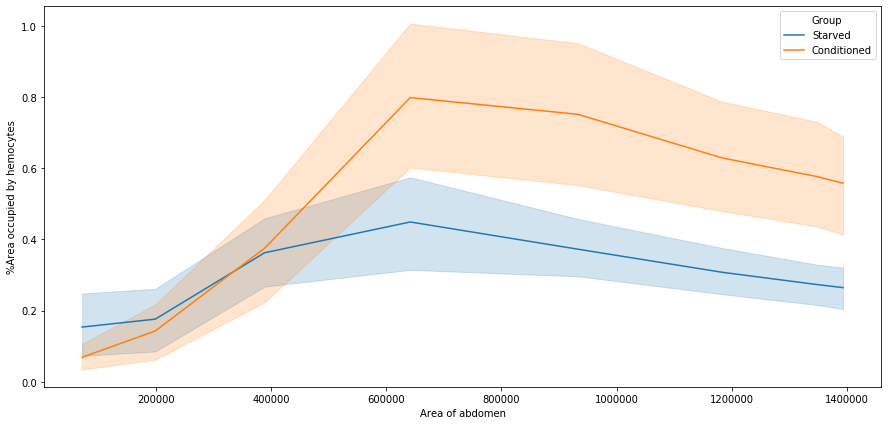

In [224]:
fig,ax = plt.subplots(figsize=(15,7))
ax = sns.lineplot(x='Area of abdomen',y='%Area occupied by hemocytes',
                  hue='Group',data=plotdist,
                  markers=True,
                  dashes=False)
#ax.set(xticklabels=[])
